In [158]:
# import necessary libraries (Pandas , Numpy , matplotlib , scikit-learn, seaborn  )
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
import seaborn as sns
from scipy.optimize import minimize
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.subplots as sp

import datetime as dt
import plotly.express as px
# import warnings
# warnings.filterwarnings('ignore')

In [160]:
# get each csv file and assign it in the variable
# variable_name = call pandas read_csv function ("file/paths/file.csv")
customer = pd.read_csv("./ERP_Beverage_Data_Medium/CustomerMaster.csv")
inventory = pd.read_csv("./ERP_Beverage_Data_Medium/InventoryBalances.csv")
product = pd.read_csv("./ERP_Beverage_Data_Medium/ProductMaster.csv")
pline = pd.read_csv("./ERP_Beverage_Data_Medium/ProductionLineMaster.csv")
porder = pd.read_csv("./ERP_Beverage_Data_Medium/ProductionOrders.csv")
sales = pd.read_csv("./ERP_Beverage_Data_Medium/SalesOrders.csv")
supplier = pd.read_csv("./ERP_Beverage_Data_Medium/SupplierMaster.csv")
wh = pd.read_csv("./ERP_Beverage_Data_Medium/WarehouseMaster.csv")

In [162]:
# in variable called dataframe : assign dictionary {} ,
#include {"key": value} where key is the name of dataframe and value is the dataframe table

dataframes = {"Customer":customer,
              "Inventory":inventory,"Product":product,"Product Line":pline,"Product Order":porder,
              "Sales":sales,"Supplier":supplier,"Warehouse":wh}

In [164]:
#shape return (rows,columns)
for name,df in dataframes.items():
    print(f"{name} : {df.shape}", end='\n\n')

Customer : (500, 5)

Inventory : (15000, 6)

Product : (25, 5)

Product Line : (10, 4)

Product Order : (5000, 7)

Sales : (25000, 7)

Supplier : (100, 5)

Warehouse : (15, 4)



In [166]:
#for a quick view for each table use .head()

for name,df in dataframes.items():
  print(f"{name}\n{df.head()}", end='\n\n')

Customer
   CustomerID                 CustomerName       CustomerCity CustomerCountry  \
0        2001                 Callahan Inc     Gilbertchester          Mexico   
1        2002  Aguirre, Baxter and Hopkins    East Nancymouth           Japan   
2        2003                Mcbride-Kelly       Timothymouth       Australia   
3        2004                   Oliver Inc  West Michelleland           Italy   
4        2005                Morrison-King           Boydfort              UK   

  PaymentTerms  
0        NET45  
1          COD  
2          COD  
3          COD  
4          EOM  

Inventory
   InventoryID  WarehouseID  ProductID  OnHand  OnOrder LastUpdated
0        30001         5010       1016    8279     2368  2025-11-26
1        30002         5007       1004   10829     2365  2025-02-20
2        30003         5009       1006    9405     2737  2025-03-01
3        30004         5010       1003   13334     2006  2025-04-14
4        30005         5003       1009    3914     

In [168]:
#Change datatype object to string
for name in dataframes:
    dataframes[name]= dataframes[name].convert_dtypes()

In [169]:
#check there is a null values in each table
#isna() return Ture=1/False=0 , and sum them return (total number of 1 or True which is missing values cells)
for name,df in dataframes.items():
    print(f"{name}\n{df.isna().sum()}", end='\n\n')

Customer
CustomerID         0
CustomerName       0
CustomerCity       0
CustomerCountry    0
PaymentTerms       0
dtype: int64

Inventory
InventoryID    0
WarehouseID    0
ProductID      0
OnHand         0
OnOrder        0
LastUpdated    0
dtype: int64

Product
ProductID          0
ProductName        0
ProductCategory    0
UnitOfMeasure      0
BasePrice          0
dtype: int64

Product Line
ProductionLineID    0
LineName            0
FacilityLocation    0
MaxCapacity         0
dtype: int64

Product Order
ProductionOrderID      0
ProductionLineID       0
ProductID              0
ProductionDate         0
BatchSize              0
UnitCost               0
TotalProductionCost    0
dtype: int64

Sales
SalesOrderID    0
OrderDate       0
CustomerID      0
ProductID       0
Quantity        0
UnitPrice       0
TotalAmount     0
dtype: int64

Supplier
SupplierID         0
SupplierName       0
SupplierCity       0
SupplierCountry    0
PaymentTerms       0
dtype: int64

Warehouse
WarehouseID      

In [172]:
for name,df in dataframes.items():
    print(name,end='\n\n')
    print(f"{df.info()}", end='\n\n')

Customer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       500 non-null    Int64 
 1   CustomerName     500 non-null    string
 2   CustomerCity     500 non-null    string
 3   CustomerCountry  500 non-null    string
 4   PaymentTerms     500 non-null    string
dtypes: Int64(1), string(4)
memory usage: 20.1 KB
None

Inventory

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   InventoryID  15000 non-null  Int64 
 1   WarehouseID  15000 non-null  Int64 
 2   ProductID    15000 non-null  Int64 
 3   OnHand       15000 non-null  Int64 
 4   OnOrder      15000 non-null  Int64 
 5   LastUpdated  15000 non-null  string
dtypes: Int64(5), string(1)
memory usage: 776.5 KB
None

Product

<c

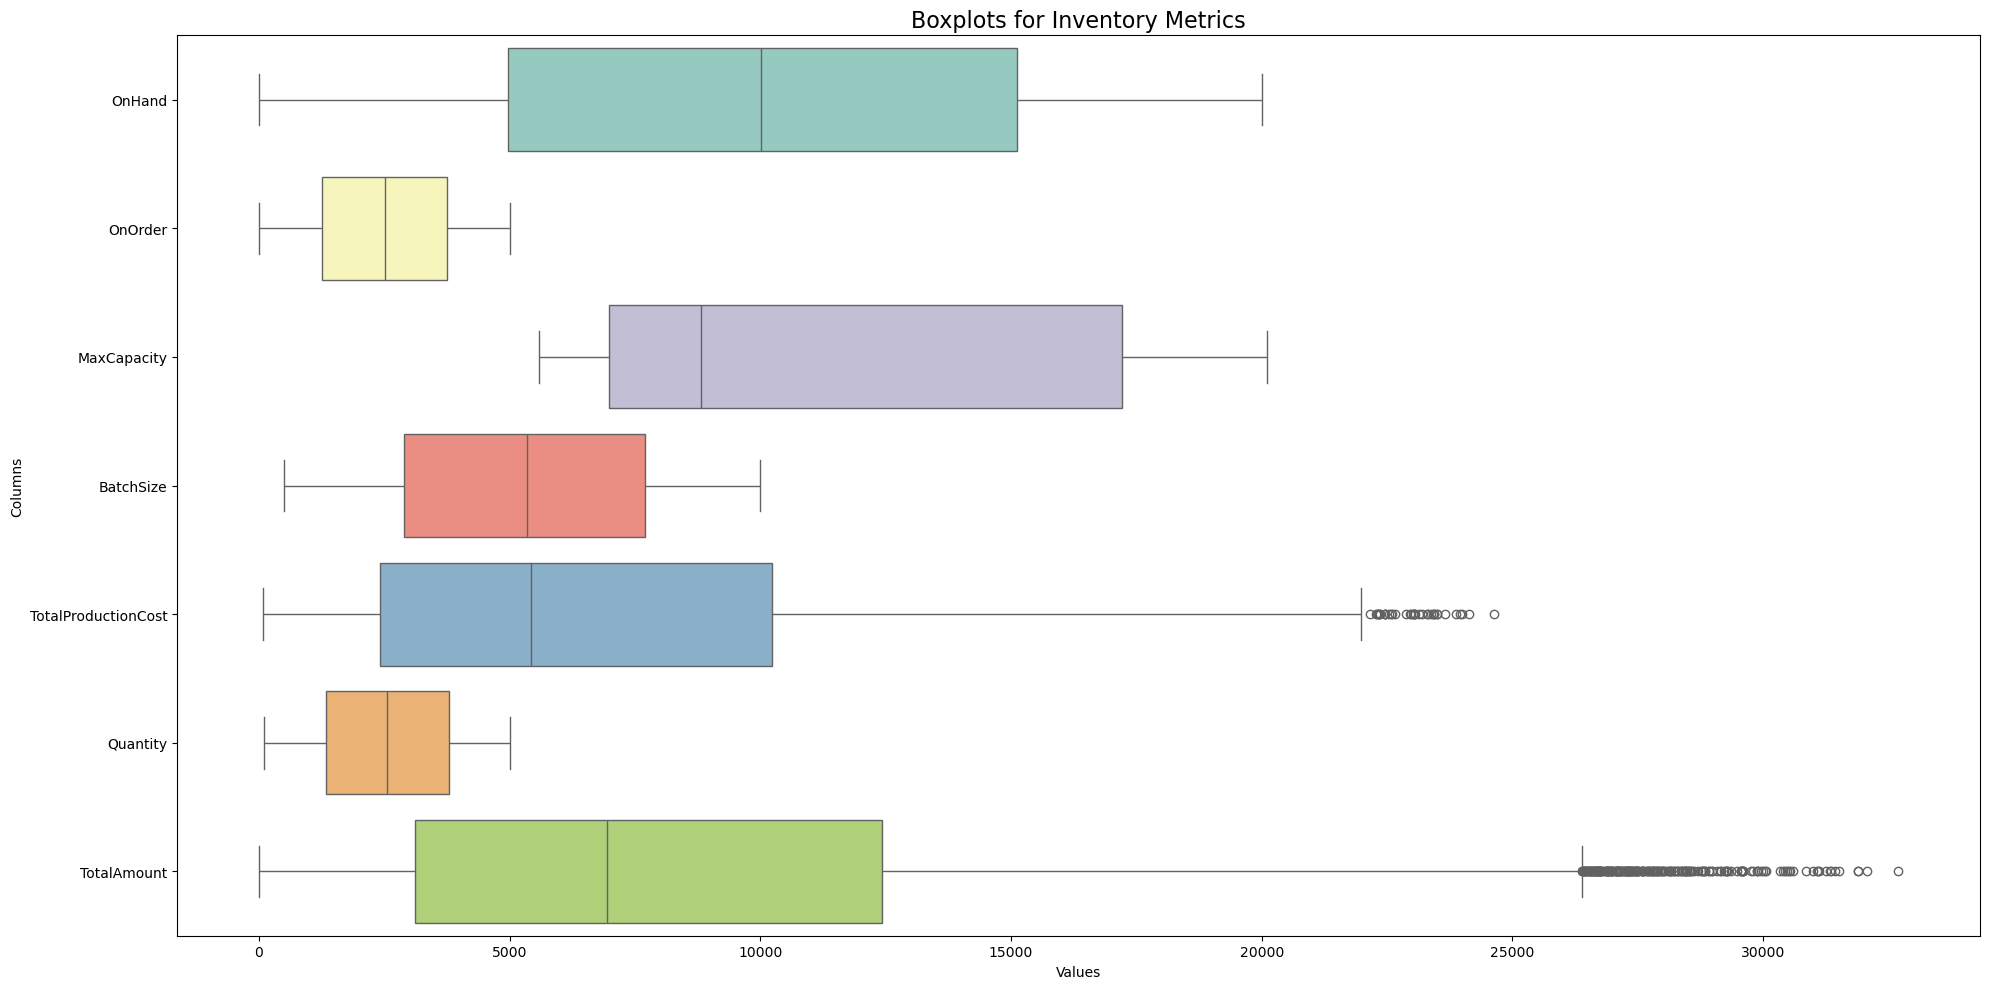

Box Plot Statistics:

Column: OnHand
Min: 2.0
Q1 (25th Percentile): 4973.5
Median (50th Percentile): 10007.0
Q3 (75th Percentile): 15126.5
Max: 19999.0
Number of Outliers: 0

Column: OnOrder
Min: 0.0
Q1 (25th Percentile): 1254.0
Median (50th Percentile): 2506.0
Q3 (75th Percentile): 3759.0
Max: 5000.0
Number of Outliers: 0

Column: MaxCapacity
Min: 5577.0
Q1 (25th Percentile): 6982.75
Median (50th Percentile): 8823.5
Q3 (75th Percentile): 17203.75
Max: 20113.0
Number of Outliers: 0

Column: BatchSize
Min: 500.0
Q1 (25th Percentile): 2889.5
Median (50th Percentile): 5343.5
Q3 (75th Percentile): 7694.0
Max: 10000.0
Number of Outliers: 0

Column: TotalProductionCost
Min: 78.96
Q1 (25th Percentile): 2406.4275000000002
Median (50th Percentile): 5426.46
Q3 (75th Percentile): 10241.8825
Max: 24636.06
Number of Outliers: 38

Column: Quantity
Min: 100.0
Q1 (25th Percentile): 1329.75
Median (50th Percentile): 2554.0
Q3 (75th Percentile): 3788.0
Max: 5000.0
Number of Outliers: 0

Column: TotalAmo

In [173]:
numeric_dfs = []

large_scale_columns = ["OnHand", "OnOrder", "MaxCapacity", "BatchSize", "TotalProductionCost", "Quantity", "TotalAmount"]

# Assuming `dataframes` is a dictionary of DataFrames
for _, df in dataframes.items():
    numeric_dfs.append(df)

# Concatenate all numeric DataFrames
df_num = pd.concat(numeric_dfs, axis=1)

# Remove duplicate column names
df_num = df_num.loc[:, ~df_num.columns.duplicated()]

# Filter for large scale columns
large_scale_df = df_num.loc[:, large_scale_columns]

# Plot boxplots for all numeric columns
plt.figure(figsize=(20, 10))
sns.boxplot(data=large_scale_df, orient='h', palette='Set3')
plt.title('Boxplots for Inventory Metrics', fontsize=16)
plt.xlabel('Values')
plt.ylabel('Columns')
plt.tight_layout()
plt.show()

# Calculate and print the statistics and outliers
print("Box Plot Statistics:")
total_outliers = 0

for column in large_scale_columns:
    stats = large_scale_df[column].describe()
    Q1 = stats['25%']
    Q3 = stats['75%']
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = large_scale_df[(large_scale_df[column] < lower_bound) | (large_scale_df[column] > upper_bound)]
    num_outliers = outliers.shape[0]
    total_outliers += num_outliers
    
    print(f"\nColumn: {column}")
    print(f"Min: {stats['min']}")
    print(f"Q1 (25th Percentile): {stats['25%']}")
    print(f"Median (50th Percentile): {stats['50%']}")
    print(f"Q3 (75th Percentile): {stats['75%']}")
    print(f"Max: {stats['max']}")
    print(f"Number of Outliers: {num_outliers}")

print(f"\nTotal Number of Outliers Across All Columns: {total_outliers}")

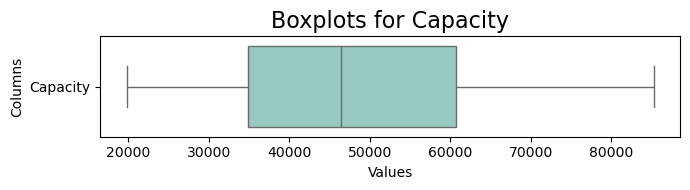

Box Plot Statistics for 'Capacity':

Column: Capacity
Min: 19792.0
Q1 (25th Percentile): 34914.5
Median (50th Percentile): 46434.0
Q3 (75th Percentile): 60661.0
Max: 85288.0


In [174]:
medium_scale_columns = ["Capacity"]

# Filter for medium scale columns
medium_scale_df = df_num.loc[:, medium_scale_columns]

# Plot boxplots for the numeric column
plt.figure(figsize=(7, 2))
sns.boxplot(data=medium_scale_df, orient='h', palette='Set3')
plt.title('Boxplots for Capacity', fontsize=16)
plt.xlabel('Values')
plt.ylabel('Columns')
plt.tight_layout()
plt.show()

# Calculate and print the statistics
print("Box Plot Statistics for 'Capacity':")
for column in medium_scale_columns:
    stats = medium_scale_df[column].describe()
    print(f"\nColumn: {column}")
    print(f"Min: {stats['min']}")
    print(f"Q1 (25th Percentile): {stats['25%']}")
    print(f"Median (50th Percentile): {stats['50%']}")
    print(f"Q3 (75th Percentile): {stats['75%']}")
    print(f"Max: {stats['max']}")

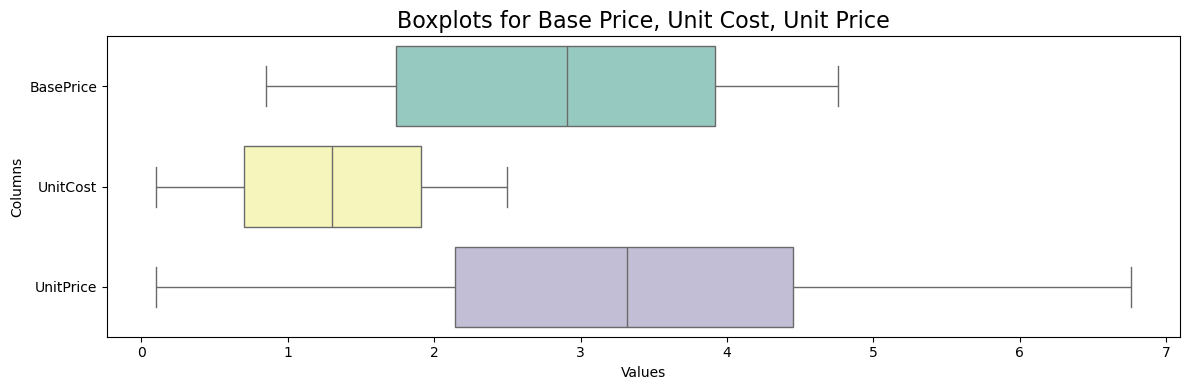

Box Plot Statistics for Small Scale Columns:

Column: BasePrice
Min: 0.85
Q1 (25th Percentile): 1.74
Median (50th Percentile): 2.91
Q3 (75th Percentile): 3.92
Max: 4.76

Column: UnitCost
Min: 0.1
Q1 (25th Percentile): 0.7
Median (50th Percentile): 1.3
Q3 (75th Percentile): 1.91
Max: 2.5

Column: UnitPrice
Min: 0.1
Q1 (25th Percentile): 2.14
Median (50th Percentile): 3.32
Q3 (75th Percentile): 4.45
Max: 6.76


In [176]:
small_scale_columns = ["BasePrice", "UnitCost", "UnitPrice"]

# Filter for small scale columns
small_scale_df = df_num.loc[:, small_scale_columns]

# Plot boxplots for the numeric columns
plt.figure(figsize=(12, 4))
sns.boxplot(data=small_scale_df, orient='h', palette='Set3')
plt.title('Boxplots for Base Price, Unit Cost, Unit Price', fontsize=16)
plt.xlabel('Values')
plt.ylabel('Columns')
plt.tight_layout()
plt.show()

# Calculate and print the statistics
print("Box Plot Statistics for Small Scale Columns:")
for column in small_scale_columns:
    stats = small_scale_df[column].describe()
    print(f"\nColumn: {column}")
    print(f"Min: {stats['min']}")
    print(f"Q1 (25th Percentile): {stats['25%']}")
    print(f"Median (50th Percentile): {stats['50%']}")
    print(f"Q3 (75th Percentile): {stats['75%']}")
    print(f"Max: {stats['max']}")

In [177]:
for name, df in dataframes.items():
    print(name, end='\n')
    print(f"{df.describe()}", end='\n\n')

Customer
       CustomerID
count       500.0
mean       2250.5
std    144.481833
min        2001.0
25%       2125.75
50%        2250.5
75%       2375.25
max        2500.0

Inventory
       InventoryID  WarehouseID  ProductID        OnHand      OnOrder
count      15000.0      15000.0    15000.0       15000.0      15000.0
mean       37500.5  5008.012467  1013.0314  10017.517467  2502.751333
std    4330.271354     4.320612   7.210049    5832.70231  1444.128129
min        30001.0       5001.0     1001.0           2.0          0.0
25%       33750.75       5004.0     1007.0        4973.5       1254.0
50%        37500.5       5008.0     1013.0       10007.0       2506.0
75%       41250.25       5012.0     1019.0       15126.5       3759.0
max        45000.0       5015.0     1025.0       19999.0       5000.0

Product
       ProductID  BasePrice
count       25.0       25.0
mean      1013.0     2.7952
std     7.359801   1.280713
min       1001.0       0.85
25%       1007.0       1.74
50%       1

In [179]:
for name,df in dataframes.items():
    print(f"{name}\n{inventory.duplicated().sum()}", end='\n\n')

Customer
0

Inventory
0

Product
0

Product Line
0

Product Order
0

Sales
0

Supplier
0

Warehouse
0



In [180]:
#From inventory table, Change 'LastUpdated' column datatype to datetime for further analysis.
inventory['LastUpdated'] = pd.to_datetime(inventory['LastUpdated'])
dataframes['Inventory'] = inventory
print(inventory.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InventoryID  15000 non-null  int64         
 1   WarehouseID  15000 non-null  int64         
 2   ProductID    15000 non-null  int64         
 3   OnHand       15000 non-null  int64         
 4   OnOrder      15000 non-null  int64         
 5   LastUpdated  15000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(5)
memory usage: 703.3 KB
None


In [181]:
#From ProductOrder table, Change 'ProductionDate' column datatype to datetime for further analysis.
porder['ProductionDate'] = pd.to_datetime(porder['ProductionDate'])
dataframes['Product Order'] = porder
print(porder.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ProductionOrderID    5000 non-null   int64         
 1   ProductionLineID     5000 non-null   int64         
 2   ProductID            5000 non-null   int64         
 3   ProductionDate       5000 non-null   datetime64[ns]
 4   BatchSize            5000 non-null   int64         
 5   UnitCost             5000 non-null   float64       
 6   TotalProductionCost  5000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 273.6 KB
None


In [183]:
#From SalesOrder table, Change 'OrderDate' column datatype to datetime for further analysis.
sales['OrderDate'] = pd.to_datetime(sales['OrderDate'])
dataframes['Sales'] = sales
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   SalesOrderID  25000 non-null  int64         
 1   OrderDate     25000 non-null  datetime64[ns]
 2   CustomerID    25000 non-null  int64         
 3   ProductID     25000 non-null  int64         
 4   Quantity      25000 non-null  int64         
 5   UnitPrice     25000 non-null  float64       
 6   TotalAmount   25000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 1.3 MB
None


Index(['Inventory_OnHand', 'Inventory_OnOrder', 'Product_BasePrice',
       'Product Line_MaxCapacity', 'Product Order_BatchSize',
       'Product Order_UnitCost', 'Product Order_TotalProductionCost',
       'Sales_Quantity', 'Sales_UnitPrice', 'Sales_TotalAmount',
       'Warehouse_Capacity'],
      dtype='object')


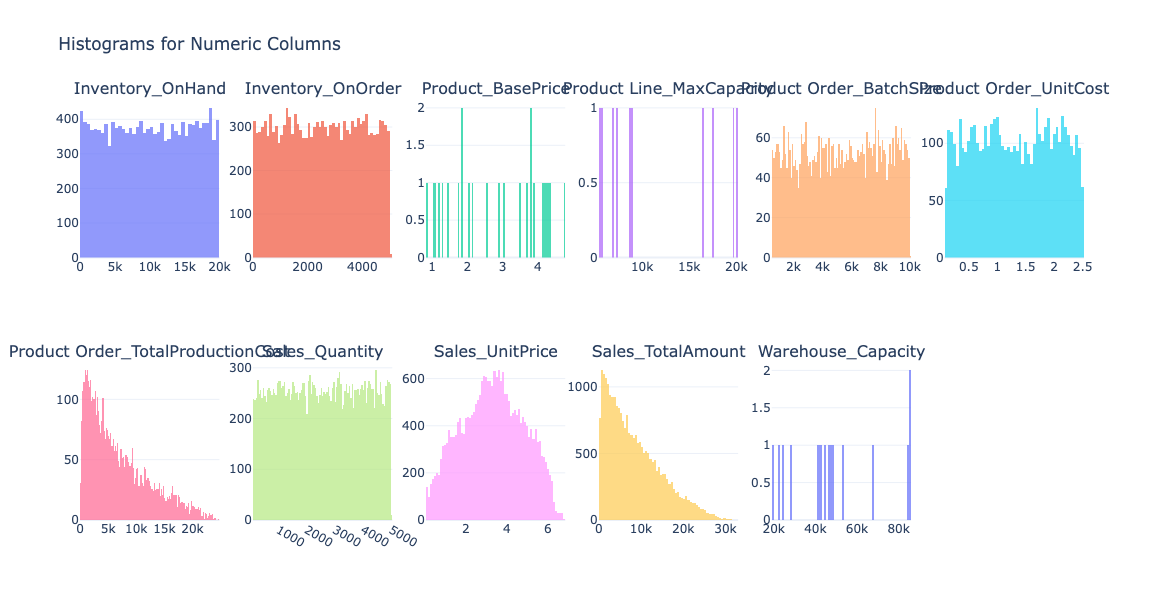

In [186]:
numeric_dfs = []

# Iterate through all DataFrames
for name, df in dataframes.items():
    # Select numeric columns, excluding those containing 'ID'
    numeric_cols = df.select_dtypes(include=['int64', 'float64'])
    numeric_cols = numeric_cols.loc[:, ~numeric_cols.columns.str.contains('ID', case=False)]
    if not numeric_cols.empty:
        numeric_dfs.append(numeric_cols)

# Concatenate all numeric DataFrames
df_num = pd.concat(numeric_dfs, axis=1)

# Ensure column names are unique
df_num.columns = [f"{name}_{col}" for name, df in dataframes.items() for col in df.select_dtypes(include=['int64', 'float64']).columns if 'ID' not in col]

print(df_num.columns)

# Determine grid size
num_cols = 6
num_rows = math.ceil(len(df_num.columns) / num_cols)

# Create subplot layout
fig = sp.make_subplots(rows=num_rows, cols=num_cols, subplot_titles=df_num.columns)

# Add histograms to subplots
for i, col in enumerate(df_num.columns):
    row = i // num_cols + 1
    col_num = i % num_cols + 1
    fig.add_trace(go.Histogram(x=df_num[col], name=col, opacity=0.7), row=row, col=col_num)

fig.update_layout(
    title='Histograms for Numeric Columns',
    showlegend=False,
    template='plotly_white',
    height=300 * num_rows, width= 1800
)

fig.show()


In [191]:
# Merge 1: Sales with Customers and Products
sales_customer_product = sales.merge(customer, on='CustomerID', how='left') \
                              .merge(product, on='ProductID', how='left')

# Merge 2: Inventory with Products and Warehouses
inventory_product_warehouse = inventory.merge(product, on='ProductID', how='left') \
                                       .merge(wh, on='WarehouseID', how='left')

# Merge 3: Production Orders with Production Lines and Products
production_order_details = porder.merge(pline, on='ProductionLineID', how='left') \
                                 .merge(product, on='ProductID', how='left')

In [192]:
print(sales_customer_product.shape)
print(inventory_product_warehouse.shape)
print(production_order_details.shape)

(25000, 15)
(15000, 13)
(5000, 14)


In [196]:
sales_customer_product.to_csv("sales_customer_product.csv")

In [197]:
inventory_product_warehouse.to_csv("inventory_product_warehouse.csv")

In [200]:
production_order_details.to_csv("production_order_details.csv")

In [202]:
# Preview merged datasets
print("Sales with Customers and Products:\n", sales_customer_product.head())
print("Inventory with Products and Warehouses:\n", inventory_product_warehouse.head())
print("Production Orders with Details:\n", production_order_details.head())

Sales with Customers and Products:
    SalesOrderID  OrderDate  CustomerID  ProductID  Quantity  UnitPrice  \
0         10001 2025-06-30        2467       1022       899       3.68   
1         10002 2023-08-23        2084       1002      1157       6.12   
2         10003 2023-06-12        2429       1009      3636       4.07   
3         10004 2025-02-13        2068       1004      1545       2.69   
4         10005 2023-11-24        2203       1009      4195       2.86   

   TotalAmount                     CustomerName        CustomerCity  \
0      3308.32                  Rosario-Navarro   West Jenniferport   
1      7080.84  Mitchell, Campos and Richardson  East Michelleville   
2     14798.52                 Hubbard and Sons          Port Shane   
3      4156.05        Taylor, Herman and Fisher         Bergchester   
4     11997.70                      King-Miller          Changburgh   

  CustomerCountry PaymentTerms    ProductName ProductCategory UnitOfMeasure  \
0          Me

In [204]:
# Merge sales with customer data
sales_customers = sales.merge(customer, on='CustomerID', how='left')
sales_customers.head()

SalesOrderID  OrderDate  CustomerID  ProductID  Quantity  UnitPrice  \
0         10001 2025-06-30        2467       1022       899       3.68   
1         10002 2023-08-23        2084       1002      1157       6.12   
2         10003 2023-06-12        2429       1009      3636       4.07   
3         10004 2025-02-13        2068       1004      1545       2.69   
4         10005 2023-11-24        2203       1009      4195       2.86   

   TotalAmount                     CustomerName        CustomerCity  \
0      3308.32                  Rosario-Navarro   West Jenniferport   
1      7080.84  Mitchell, Campos and Richardson  East Michelleville   
2     14798.52                 Hubbard and Sons          Port Shane   
3      4156.05        Taylor, Herman and Fisher         Bergchester   
4     11997.70                      King-Miller          Changburgh   

  CustomerCountry PaymentTerms  
0          Mexico          EOM  
1           India          EOM  
2          France        NET15  
3       Australia        NET30  
4           Japan          COD

In [206]:
# Aggregate production orders to avoid duplication
porder_agg = porder.groupby("ProductID").agg({
    "ProductionOrderID": "count",  # Count of production orders per product
    "BatchSize": "sum",  # Total batch size
    "UnitCost": "mean",  # Average unit cost
    "TotalProductionCost": "sum"  # Total production cost
}).reset_index()

# Rename aggregated columns
porder_agg.rename(columns={"ProductionOrderID": "Total_Production_Orders"}, inplace=True)

# Merge sales with product and aggregated production orders
sales_product_order = (
    sales.merge(product, on="ProductID", how="left")
         .merge(porder_agg, on="ProductID", how="left")  # Use aggregated production orders
)


In [208]:
sales_product_order.shape

(25000, 15)

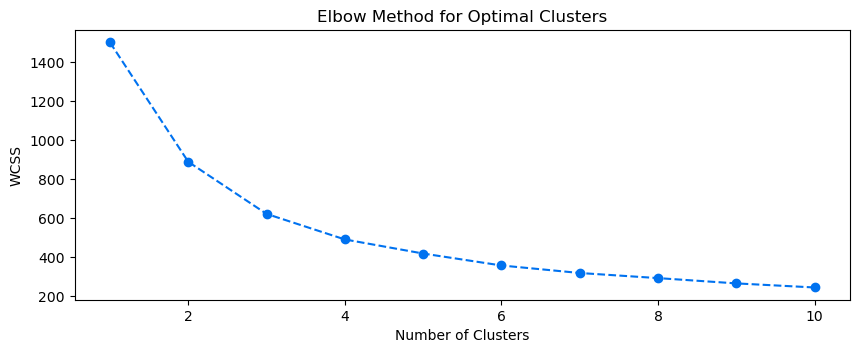

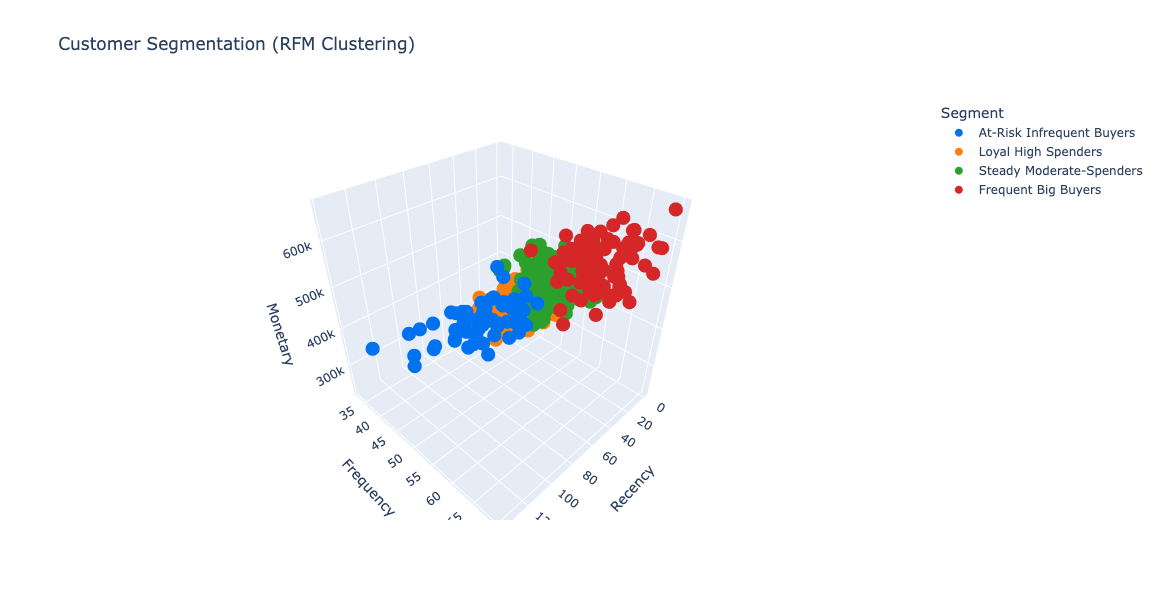

In [214]:

last_date = pd.to_datetime("2025-12-31")

# Load dataset
df = sales_customer_product.copy()
# Convert 'OrderDate' to datetime
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Define today's date for recency calculation
today_date = dt.datetime(2025, 7, 1)  # Assuming analysis date is July 1, 2025

# RFM Calculation
rfm = df.groupby('CustomerID').agg({
    'OrderDate': lambda x: (last_date - x.max()).days,  # Recency (Days since last purchase)
    'SalesOrderID': 'count',  # Frequency (Total orders)
    'TotalAmount': 'sum'  # Monetary (Total spend)
}).rename(columns={'OrderDate': 'Recency', 'SalesOrderID': 'Frequency', 'TotalAmount': 'Monetary'})

# Scale the RFM data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Determine optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 3.5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='#0072f0')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# Apply K-Means Clustering (choosing 4 clusters based on elbow method)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Map cluster labels for interpretation
cluster_labels = {
    0: 'Loyal High Spenders',
    1: 'Frequent Big Buyers',
    2: 'At-Risk Infrequent Buyers',
    3: 'Steady Moderate-Spenders'
}
rfm['Segment'] = rfm['Cluster'].map(cluster_labels)

# Plot Clusters using Plotly
fig = px.scatter_3d(rfm, 
                     x='Recency', 
                     y='Frequency', 
                     z='Monetary', 
                     color='Segment', 
                     title='Customer Segmentation (RFM Clustering)',
                     color_discrete_sequence=['#0072f0', '#ff7f0e', '#2ca02c', '#d62728'],
                     hover_data=['Recency', 'Frequency', 'Monetary'])

fig.update_layout(width=900, height=600)
fig.show()


In [216]:
# df =sales_product_order[["BasePrice","UnitCost","Quantity"]]
df_grouped = sales_product_order.groupby("ProductName").agg({
    "BasePrice": "mean",  # Average base price
    "UnitCost": "mean",   # Average unit cost
    "Quantity": "sum"     # Total quantity sold
}).sort_values(by="BasePrice").reset_index()

In [268]:
# from scipy.optimize import minimize
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Define Revenue Maximization Function
# def revenue_optimization(price, cost, sales):
#     revenue = (price - cost) * sales  # Profit per unit * Sales
#     return -revenue  # Negate to maximize

# # Define Category-Based Pricing Constraints
# category_price_bounds = {
#     "Carbonated Soft Drink": (1.11, 1.8),  # Moderate markup
#     "Water": (1.05, 1.3),  # Lower price ceiling
#     "Energy Drink": (1.18, 2.3),  # Higher premium pricing
#     "Tea": (1.28, 2.5),  # Balanced pricing
#     "Coffee": (1.34, 2.8),  # High markup for specialty products
#     "Juice": (1.25, 2.3)  # Premium pricing similar to energy drinks
# }

# # Merge Product Categories
# df_grouped_cat = df_grouped.merge(product, on="ProductName", how="left")

# # Initialize Optimized Prices List
# optimized_prices = []

# # Define a factor to keep prices closer to the base price
# deviation_factor = 0.12  # 10% deviation allowed from base price

# # Optimize Pricing for Each Product
# for index, row in df_grouped_cat.iterrows():
#     category = row["ProductCategory"]
#     cost, sales, base_price = row["UnitCost"], row["Quantity"], row["BasePrice_x"]

#     # Get category-based pricing bounds
#     min_multiplier, max_multiplier = category_price_bounds.get(category, (1.1, 2.5))

#     # Apply deviation factor to ensure price remains close to the base price
#     adjusted_min_price = max(base_price * (1 - deviation_factor), cost * min_multiplier)
#     adjusted_max_price = min(base_price * (1 + deviation_factor), cost * max_multiplier)

#     # Ensure that adjusted prices are within the category bounds
#     adjusted_min_price = max(adjusted_min_price, cost * min_multiplier)
#     adjusted_max_price = min(adjusted_max_price, cost * max_multiplier)

#     # Bound checks to avoid conflict between min and max prices
#     if adjusted_min_price > adjusted_max_price:
#         adjusted_min_price, adjusted_max_price = adjusted_max_price, adjusted_min_price

#     bounds = [(adjusted_min_price, adjusted_max_price)]

#     # Optimize price
#     opt_result = minimize(
#         revenue_optimization,
#         x0=[base_price],  # Initial guess (starting from base price)
#         args=(cost, sales),
#         bounds=bounds
#     )

#     optimized_prices.append(opt_result.x[0])

# # Store Optimized Prices in DataFrame
# df_grouped_cat["OptimizedPrice"] = optimized_prices

# # 📊 Visualization - Before & After Price Adjustment
# plt.figure(figsize=(12, 6))
# sns.scatterplot(data=df_grouped_cat, x="ProductName", y="BasePrice_x", label="Current Price", color="blue")
# sns.scatterplot(data=df_grouped_cat, x="ProductName", y="OptimizedPrice", label="Optimized Price", color="red")
# plt.xticks(rotation=45, ha="right")
# plt.xlabel("Product Name")
# plt.ylabel("Price")
# plt.title("Optimized Pricing for Each Product Category")
# plt.legend()
# plt.show()

# # Show updated DataFrame with category-based pricing
# df_g = df_grouped_cat[["ProductName", "ProductCategory", "UnitCost", "BasePrice_x", "OptimizedPrice", "Quantity"]]
# cs = df_g["ProductCategory"] == "Carbonated Soft Drink"
# w = df_g["ProductCategory"] == "Water"
# e = df_g["ProductCategory"] == "Energy Drink"
# c = df_g["ProductCategory"] == "Coffee"
# j = df_g["ProductCategory"] == "Juice"
# t = df_g["ProductCategory"] == "Tea"
# df_g


In [280]:
# df_g[cs]

In [282]:
# df_g[w]

In [284]:
# df_g[e]

In [286]:
# df_g[c]

In [288]:
# df_g[j]

In [290]:
# df_g[t]

In [232]:
# import pandas as pd
# import numpy as np
# import datetime as dt
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans

# # Load dataset
# df = sales_customer_product.copy()

# # Convert 'OrderDate' to datetime
# df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# # Define today's date for recency calculation
# today_date = dt.datetime(2025, 7, 1)  # Assuming analysis date is July 1, 2025

# # RFM Calculation
# rfm = df.groupby('CustomerID').agg({
#     'OrderDate': lambda x: (today_date - x.m()).days,  # Recency (Days since last purchase)
#     'SalesOrderID': 'count',  # Frequency (Total orders)
#     'TotalAmount': 'sum'  # Monetary (Total spend)
# }).rename(columns={'OrderDate': 'Recency', 'SalesOrderID': 'Frequency', 'TotalAmount': 'Monetary'})

# # Scale the RFM data
# scaler = StandardScaler()
# rfm_scaled = scaler.fit_transform(rfm)

# # Determine optimal number of clusters using the Elbow Method
# wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
#     kmeans.fit(rfm_scaled)
#     wcss.append(kmeans.inertia_)

# # Plot Elbow Method using Matplotlib
# plt.figure(figsize=(10, 5))
# plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='#0072f0')
# plt.xlabel('Number of Clusters')
# plt.ylabel('WCSS')
# plt.title('Elbow Method for Optimal Clusters')
# plt.show()

# # Apply K-Means Clustering (choosing 4 clusters based on elbow method)
# kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
# rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# # Map cluster labels for interpretation
# cluster_labels = {
#     0: 'High-Value Customers',
#     1: 'Loyal Customers',
#     2: 'At-Risk Customers',
#     3: 'Low-Value Customers'
# }
# rfm['Segment'] = rfm['Cluster'].map(cluster_labels)

# # Plot Clusters using Seaborn Pairplot
# sns.pairplot(rfm, hue='Segment', palette='Set1', diag_kind='kde')
# plt.suptitle('Customer Segmentation (RFM Clustering)', y=1.02)
# plt.show()


In [110]:
rfmoutput = rfm.sort_values(by= 'Cluster')

In [112]:
rfmoutput.to_csv('rfm.csv',index=False)

In [234]:
rfmminmax  = rfmoutput.groupby('Cluster').agg({
    "Recency" : ['min','mean', 'median' , 'max'],
    "Frequency" : ['min','mean', 'median' , 'max'],
    "Monetary" : ['min','mean', 'median' , 'max'],

})

In [236]:
rfmminmax.to_csv('rfmmm.csv',index=False)

In [238]:
inventory_product_warehouse.head()

InventoryID  WarehouseID  ProductID  OnHand  OnOrder LastUpdated  \
0        30001         5010       1016    8279     2368  2025-11-26   
1        30002         5007       1004   10829     2365  2025-02-20   
2        30003         5009       1006    9405     2737  2025-03-01   
3        30004         5010       1003   13334     2006  2025-04-14   
4        30005         5003       1009    3914     3812  2024-01-30   

      ProductName ProductCategory UnitOfMeasure  BasePrice   WarehouseName  \
0  Compare Ground           Water          CASE       1.22  Warehouse_5010   
1   Daughter Drop          Coffee           CAN       1.87  Warehouse_5007   
2    Sign Ability             Tea        BOTTLE       2.13  Warehouse_5009   
3        Old Tell             Tea           BOX       4.31  Warehouse_5010   
4     Party Great    Energy Drink           CAN       3.72  Warehouse_5003   

       Location  Capacity  
0   West Amanda     84628  
1  Charlesburgh     28602  
2    New Norman     19792  
3   West Amanda     84628  
4    New Rachel     85288

In [240]:
# Assuming df is your DataFrame with the relevant columns
# Convert LastUpdated to datetime
inventory_product_warehouse['LastUpdated'] = pd.to_datetime(inventory_product_warehouse['LastUpdated'])

# Create Year-Quarter column
inventory_product_warehouse['YearQuarter'] = inventory_product_warehouse['LastUpdated'].dt.to_period("Q").dt.start_time
# Calculate Actual Inventory
inventory_product_warehouse['ActualInventory'] = inventory_product_warehouse['OnHand'] + inventory_product_warehouse['OnOrder']

# Sort data to calculate the difference correctly
inventory_product_warehouse.sort_values(by=['ProductID', 'WarehouseID', 'LastUpdated'], inplace=True)

# Calculate the difference in LastUpdated dates
inventory_product_warehouse['PreviousLastUpdated'] = inventory_product_warehouse.groupby(['ProductID', 'WarehouseID'])['LastUpdated'].shift(1)
inventory_product_warehouse['DaysBetweenUpdates'] = (inventory_product_warehouse['LastUpdated'] - inventory_product_warehouse['PreviousLastUpdated']).dt.days

# Group by YearQuarter, ProductID, and WarehouseID to get the total inventory
result = inventory_product_warehouse.groupby(['YearQuarter', 'ProductID', 'WarehouseID'])['ActualInventory'].sum().reset_index()

# Merge to include the DaysBetweenUpdates
final_df = pd.merge(result, inventory_product_warehouse[['YearQuarter', 'ProductID', 'WarehouseID', 'DaysBetweenUpdates']],
                    on=['YearQuarter', 'ProductID', 'WarehouseID'],
                    how='left').drop_duplicates()

# Display the final result
print(final_df)


      YearQuarter  ProductID  WarehouseID  ActualInventory  DaysBetweenUpdates
0      2023-01-01       1001         5001            41672                 NaN
1      2023-01-01       1001         5001            41672                 1.0
2      2023-01-01       1001         5001            41672                28.0
3      2023-01-01       1001         5002            82395                 NaN
4      2023-01-01       1001         5002            82395                 0.0
...           ...        ...          ...              ...                 ...
14995  2025-10-01       1025         5013            89736                 1.0
14996  2025-10-01       1025         5014            20946                33.0
14997  2025-10-01       1025         5014            20946                65.0
14998  2025-10-01       1025         5015            37885                48.0
14999  2025-10-01       1025         5015            37885                75.0

[14485 rows x 5 columns]


In [242]:
final_df["DaysBetweenUpdates"]= final_df["DaysBetweenUpdates"].fillna(0)

In [244]:
final_df.to_csv("inventory_groupby.csv",index=False)

In [246]:
final_df.head()

YearQuarter  ProductID  WarehouseID  ActualInventory  DaysBetweenUpdates
0  2023-01-01       1001         5001            41672                 0.0
1  2023-01-01       1001         5001            41672                 1.0
2  2023-01-01       1001         5001            41672                28.0
3  2023-01-01       1001         5002            82395                 0.0
4  2023-01-01       1001         5002            82395                 0.0

In [248]:
sales_customer_product

SalesOrderID  OrderDate  CustomerID  ProductID  Quantity  UnitPrice  \
0             10001 2025-06-30        2467       1022       899       3.68   
1             10002 2023-08-23        2084       1002      1157       6.12   
2             10003 2023-06-12        2429       1009      3636       4.07   
3             10004 2025-02-13        2068       1004      1545       2.69   
4             10005 2023-11-24        2203       1009      4195       2.86   
...             ...        ...         ...        ...       ...        ...   
24995         34996 2025-02-11        2036       1017      2162       2.30   
24996         34997 2025-11-22        2339       1023      2905       3.60   
24997         34998 2025-06-08        2403       1012       564       0.45   
24998         34999 2023-12-01        2120       1009      3305       5.25   
24999         35000 2024-08-15        2153       1020      3702       3.51   

       TotalAmount                     CustomerName        CustomerCity  \
0          3308.32                  Rosario-Navarro   West Jenniferport   
1          7080.84  Mitchell, Campos and Richardson  East Michelleville   
2         14798.52                 Hubbard and Sons          Port Shane   
3          4156.05        Taylor, Herman and Fisher         Bergchester   
4         11997.70                      King-Miller          Changburgh   
...            ...                              ...                 ...   
24995      4972.60       Rojas, Harris and Randolph       Johnathanfurt   
24996     10458.00                     Robinson Ltd        East Stanley   
24997       253.80      Cisneros, Walker and Thomas       Taylorchester   
24998     17351.25              Combs, King and Cox        Richardburgh   
24999     12994.02                   Brennan-Valdez      Port Darylland   

      CustomerCountry PaymentTerms           ProductName ProductCategory  \
0              Mexico          EOM             Under Dog          Coffee   
1               India          EOM             Born Near    Energy Drink   
2              France        NET15           Party Great    Energy Drink   
3           Australia        NET30         Daughter Drop          Coffee   
4               Japan          COD           Party Great    Energy Drink   
...               ...          ...                   ...             ...   
24995          Brazil          EOM             New Occur    Energy Drink   
24996       Singapore          EOM  Information Democrat             Tea   
24997             USA        NET45        Energy Teacher           Water   
24998       Australia          COD           Party Great    Energy Drink   
24999           Italy        NET45          Discuss Them           Juice   

      UnitOfMeasure  BasePrice  
0              CASE       2.91  
1            BOTTLE       4.36  
2               CAN       3.72  
3               CAN       1.87  
4               CAN       3.72  
...             ...        ...  
24995           CAN       1.74  
24996          CASE       3.80  
24997        BOTTLE       1.43  
24998           CAN       3.72  
24999          CASE       2.56  

[25000 rows x 15 columns]

In [250]:
# Assuming df is your sales_customer_product DataFrame with columns like 'SalesDate', 'ProductID', and 'Quantity'
# Convert SalesDate to datetime


sales_customer_product['SalesDate'] = pd.to_datetime(sales_customer_product['OrderDate'])

# Create Year-Quarter column
sales_customer_product['YearQuarter'] = sales_customer_product['OrderDate'].dt.to_period("Q").dt.start_time

# Group by YearQuarter and ProductID and sum the Quantity
result = sales_customer_product.groupby(['YearQuarter', 'ProductID'])['Quantity'].sum().reset_index()

# Display the result
print(result)


    YearQuarter  ProductID  Quantity
0    2023-01-01       1001    208465
1    2023-01-01       1002    188327
2    2023-01-01       1003    163078
3    2023-01-01       1004    199833
4    2023-01-01       1005    166435
..          ...        ...       ...
295  2025-10-01       1021    188457
296  2025-10-01       1022    271017
297  2025-10-01       1023    198071
298  2025-10-01       1024    259868
299  2025-10-01       1025    181903

[300 rows x 3 columns]


In [252]:
result.to_csv("sales_groupby.csv",index=False)

In [254]:
inventory_product_warehouse.sort_values(by="LastUpdated")

InventoryID  WarehouseID  ProductID  OnHand  OnOrder LastUpdated  \
4977         34978         5006       1012    1860     3163  2023-01-01   
1892         31893         5008       1006    9570     1267  2023-01-01   
13059        43060         5013       1004    3697     3672  2023-01-01   
9012         39013         5014       1003    7366      945  2023-01-01   
2095         32096         5003       1016    7812       88  2023-01-01   
...            ...          ...        ...     ...      ...         ...   
4180         34181         5015       1011    7901     1054  2025-12-31   
5478         35479         5012       1003    8934     1536  2025-12-31   
14522        44523         5013       1003   12600     4841  2025-12-31   
14696        44697         5005       1004    1598      134  2025-12-31   
4619         34620         5001       1010   18078      817  2025-12-31   

                ProductName        ProductCategory UnitOfMeasure  BasePrice  \
4977         Energy Teacher                  Water        BOTTLE       1.43   
1892           Sign Ability                    Tea        BOTTLE       2.13   
13059         Daughter Drop                 Coffee           CAN       1.87   
9012               Old Tell                    Tea           BOX       4.31   
2095         Compare Ground                  Water          CASE       1.22   
...                     ...                    ...           ...        ...   
4180   Collection Religious  Carbonated Soft Drink        BOTTLE       1.31   
5478               Old Tell                    Tea           BOX       4.31   
14522              Old Tell                    Tea           BOX       4.31   
14696         Daughter Drop                 Coffee           CAN       1.87   
4619        Collection Wear                 Coffee           CAN       4.76   

        WarehouseName            Location  Capacity YearQuarter  \
4977   Warehouse_5006           Davidtown     85110  2023-01-01   
1892   Warehouse_5008       Morrischester     67984  2023-01-01   
13059  Warehouse_5013           Cantufort     44022  2023-01-01   
9012   Warehouse_5014        Lake William     41227  2023-01-01   
2095   Warehouse_5003          New Rachel     85288  2023-01-01   
...               ...                 ...       ...         ...   
4180   Warehouse_5015  Port Carlosborough     47753  2025-10-01   
5478   Warehouse_5012          Port Brett     53338  2025-10-01   
14522  Warehouse_5013           Cantufort     44022  2025-10-01   
14696  Warehouse_5005          Chungmouth     42594  2025-10-01   
4619   Warehouse_5001    South Jacqueline     48063  2025-10-01   

       ActualInventory PreviousLastUpdated  DaysBetweenUpdates  
4977              5023                 NaT                 NaN  
1892             10837                 NaT                 NaN  
13059             7369                 NaT                 NaN  
9012              8311                 NaT                 NaN  
2095              7900                 NaT                 NaN  
...                ...                 ...                 ...  
4180              8955          2025-12-16                15.0  
5478             10470          2025-11-25                36.0  
14522            17441          2025-11-25                36.0  
14696             1732          2025-12-24                 7.0  
4619             18895          2025-12-22                 9.0  

[15000 rows x 17 columns]

In [256]:
inventory_product_warehouse.to_csv("inventory_product_warehouse2.csv",index=False)

In [258]:
ipw = inventory_product_warehouse.dropna()[["OnHand","LastUpdated","PreviousLastUpdated","WarehouseID","ProductID"]]
ipw

OnHand LastUpdated PreviousLastUpdated  WarehouseID  ProductID
13057   15381  2023-01-23          2023-01-22         5001       1001
5027     8244  2023-02-20          2023-01-23         5001       1001
93       2611  2023-04-02          2023-02-20         5001       1001
2403    15780  2023-06-15          2023-04-02         5001       1001
12703   15723  2023-06-15          2023-06-15         5001       1001
...       ...         ...                 ...          ...        ...
906     16738  2025-05-22          2025-05-04         5015       1025
12494    4215  2025-05-25          2025-05-22         5015       1025
2336    17089  2025-08-20          2025-05-25         5015       1025
713     18633  2025-10-07          2025-08-20         5015       1025
1960    12470  2025-12-21          2025-10-07         5015       1025

[14625 rows x 5 columns]

In [260]:
result = {"LastUpdated":[],"PreviousLastUpdated":[],"WarehouseID":[],"ProductID":[],"OnHandDiff":[]}
for index,row in ipw.iterrows():
    f = (ipw["LastUpdated"] == row["PreviousLastUpdated"]) & (ipw["WarehouseID"] == row["WarehouseID"]) & (ipw["ProductID"] == row["ProductID"])
    pv = ipw[f]
    if len(pv) == 1:
        m = row["OnHand"] - pv["OnHand"].values[0]
        result["LastUpdated"].append(row["LastUpdated"])
        result["PreviousLastUpdated"].append(row["PreviousLastUpdated"])
        result["WarehouseID"].append(row["WarehouseID"])
        result["ProductID"].append(row["ProductID"])
        result["OnHandDiff"].append(m)

x = pd.DataFrame(result)




In [261]:
x.head(10)

LastUpdated PreviousLastUpdated  WarehouseID  ProductID  OnHandDiff
0  2023-02-20          2023-01-23         5001       1001       -7137
1  2023-04-02          2023-02-20         5001       1001       -5633
2  2023-06-15          2023-04-02         5001       1001       13169
3  2023-06-30          2023-06-20         5001       1001      -17174
4  2023-07-07          2023-06-30         5001       1001        9882
5  2023-07-24          2023-07-07         5001       1001        4861
6  2023-10-19          2023-07-24         5001       1001      -12647
7  2023-11-08          2023-10-19         5001       1001        4304
8  2023-11-18          2023-11-08         5001       1001        1397
9  2024-01-31          2023-11-18         5001       1001       -7134

In [266]:
# x.to_csv("Inventory_Difference.csv",index=False)